In [48]:
### Load in necessary libraries for data input and normalization
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data and checking
dataset = pd.read_csv(r'C:\Users\MADYMA\Desktop\Python\OAS.csv')

# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(dataset['Date'])

# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

df2 = dataset.set_index(datetime_index)

# Dropping the extra date column
df3 = df2.drop(columns=['Date'])

In [49]:
#normalize values in every column
df_norm = (df3-df3.min())/ (df3.max() - df3.min())

#view normalized DataFrame
df_norm

# Printing Normalized Data
#with pd.ExcelWriter(r'C:\Users\MADYMA\Desktop\Python\NormalizedOAS.xlsx') as writer: 
    #df_norm.to_excel(writer, sheet_name='OAS')

,OAS
2017-03-21,0.422319
2017-03-22,0.415723
2017-03-23,0.422299
2017-03-24,0.427828
2017-03-27,0.422596
...,...
2022-03-15,0.419881
2022-03-16,0.458066
2022-03-17,0.426508
2022-03-18,0.401694


In [50]:
# Load in and normalize the dataset
dataset = np.loadtxt(r'C:\Users\MADYMA\Desktop\Python\NormalizedOAS.csv')

Text(0, 0.5, 'normalized series value')

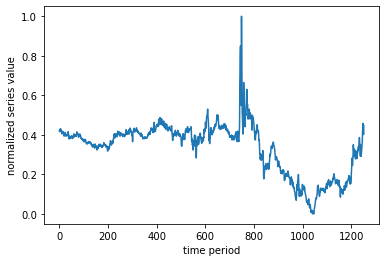

In [52]:
# lets take a look at our time series
plt.plot(dataset)
plt.xlabel('time period')
plt.ylabel('normalized series value')

In [53]:
### The function below transforms the input series and window-size into a set of input/output pairs for our RNN model
def window_transform_series(series,window_size):
    # containers for input/output pairs
    X = []
    y = []
    
    for i in range(window_size, len(series)):
        X.append(series[i - window_size:i])
        y.append(series[i])
        
        
    # reshape each 
    X = np.asarray(X)
    X.shape = (np.shape(X)[0:2])
    y = np.asarray(y)
    y.shape = (len(y),1)
    
    return X,y

In [61]:
# And now we can window the data using our windowing function
window_size = 10
X,y = window_transform_series(series = dataset,window_size = window_size)

In [62]:
# split our dataset into training / testing sets
train_test_split = int(np.ceil(2*len(y)/float(3)))   # set the split point

# partition the training set
X_train = X[:train_test_split,:]
y_train = y[:train_test_split]

# keep the last chunk for testing
X_test = X[train_test_split:,:]
y_test = y[train_test_split:]

# NOTE: to use keras's RNN LSTM module our input must be reshaped to [samples, window size, stepsize] 
X_train = np.asarray(np.reshape(X_train, (X_train.shape[0], window_size, 1)))
X_test = np.asarray(np.reshape(X_test, (X_test.shape[0], window_size, 1)))

In [63]:
# import keras network libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow import keras
from keras import optimizers

# start with fixed random seed
np.random.seed(0)


# Build an RNN to perform regression on our time series input/output data
model = Sequential()
model.add(LSTM(5, input_shape=(window_size, 1)))
model.add(Dense(1))

optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# compile the model
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [64]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1)

Epoch 1/500
13/13 [==============================] - 2s 4ms/step - loss: 0.1489
Epoch 2/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0643
Epoch 3/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0229
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 5/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0021
Epoch 8/500
13/13 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 9/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 10/500
13/13 [==============================] - 0s 4ms/step - loss: 0.0019
Epoch 11/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 12/500
13/13 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 13/500
13/13 [=================

13/13 [==============================] - 0s 3ms/step - loss: 9.2125e-04
Epoch 102/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1610e-04
Epoch 103/500
13/13 [==============================] - 0s 3ms/step - loss: 9.4396e-04
Epoch 104/500
13/13 [==============================] - 0s 3ms/step - loss: 9.2910e-04
Epoch 105/500
13/13 [==============================] - 0s 3ms/step - loss: 9.1485e-04
Epoch 106/500
13/13 [==============================] - 0s 3ms/step - loss: 9.0365e-04
Epoch 107/500
13/13 [==============================] - 0s 4ms/step - loss: 9.4282e-04
Epoch 108/500
13/13 [==============================] - 0s 4ms/step - loss: 9.0082e-04
Epoch 109/500
13/13 [==============================] - 0s 3ms/step - loss: 9.5805e-04
Epoch 110/500
13/13 [==============================] - 0s 4ms/step - loss: 9.1445e-04
Epoch 111/500
13/13 [==============================] - 0s 3ms/step - loss: 8.7252e-04
Epoch 112/500
13/13 [==============================] - 0s 3ms/step -

13/13 [==============================] - 0s 3ms/step - loss: 7.5092e-04
Epoch 197/500
13/13 [==============================] - 0s 3ms/step - loss: 7.1976e-04
Epoch 198/500
13/13 [==============================] - 0s 4ms/step - loss: 7.3396e-04
Epoch 199/500
13/13 [==============================] - 0s 4ms/step - loss: 7.1252e-04
Epoch 200/500
13/13 [==============================] - 0s 4ms/step - loss: 7.5054e-04
Epoch 201/500
13/13 [==============================] - 0s 4ms/step - loss: 7.1336e-04
Epoch 202/500
13/13 [==============================] - 0s 4ms/step - loss: 7.1604e-04
Epoch 203/500
13/13 [==============================] - 0s 3ms/step - loss: 7.2348e-04
Epoch 204/500
13/13 [==============================] - 0s 4ms/step - loss: 7.3012e-04
Epoch 205/500
13/13 [==============================] - 0s 3ms/step - loss: 7.0592e-04
Epoch 206/500
13/13 [==============================] - 0s 3ms/step - loss: 7.3571e-04
Epoch 207/500
13/13 [==============================] - 0s 3ms/step -

13/13 [==============================] - 0s 4ms/step - loss: 6.1626e-04
Epoch 292/500
13/13 [==============================] - 0s 3ms/step - loss: 6.6263e-04
Epoch 293/500
13/13 [==============================] - 0s 3ms/step - loss: 6.1322e-04
Epoch 294/500
13/13 [==============================] - 0s 3ms/step - loss: 6.4519e-04
Epoch 295/500
13/13 [==============================] - 0s 3ms/step - loss: 6.2780e-04
Epoch 296/500
13/13 [==============================] - 0s 3ms/step - loss: 6.1450e-04
Epoch 297/500
13/13 [==============================] - 0s 3ms/step - loss: 6.2963e-04
Epoch 298/500
13/13 [==============================] - 0s 3ms/step - loss: 6.2857e-04
Epoch 299/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3411e-04
Epoch 300/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3017e-04
Epoch 301/500
13/13 [==============================] - 0s 3ms/step - loss: 6.3523e-04
Epoch 302/500
13/13 [==============================] - 0s 3ms/step -

13/13 [==============================] - 0s 3ms/step - loss: 5.6733e-04
Epoch 387/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9904e-04
Epoch 388/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7861e-04
Epoch 389/500
13/13 [==============================] - 0s 3ms/step - loss: 5.8032e-04
Epoch 390/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7561e-04
Epoch 391/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9282e-04
Epoch 392/500
13/13 [==============================] - 0s 3ms/step - loss: 5.9040e-04
Epoch 393/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6223e-04
Epoch 394/500
13/13 [==============================] - 0s 3ms/step - loss: 5.6122e-04
Epoch 395/500
13/13 [==============================] - 0s 4ms/step - loss: 5.7140e-04
Epoch 396/500
13/13 [==============================] - 0s 3ms/step - loss: 5.7016e-04
Epoch 397/500
13/13 [==============================] - 0s 3ms/step -

13/13 [==============================] - 0s 3ms/step - loss: 5.3932e-04
Epoch 482/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3561e-04
Epoch 483/500
13/13 [==============================] - 0s 4ms/step - loss: 5.3516e-04
Epoch 484/500
13/13 [==============================] - 0s 3ms/step - loss: 5.3649e-04
Epoch 485/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5355e-04
Epoch 486/500
13/13 [==============================] - 0s 4ms/step - loss: 5.3098e-04
Epoch 487/500
13/13 [==============================] - 0s 4ms/step - loss: 5.3444e-04
Epoch 488/500
13/13 [==============================] - 0s 3ms/step - loss: 5.5353e-04
Epoch 489/500
13/13 [==============================] - 0s 4ms/step - loss: 5.2832e-04
Epoch 490/500
13/13 [==============================] - 0s 3ms/step - loss: 5.2699e-04
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 5.4405e-04
Epoch 492/500
13/13 [==============================] - 0s 3ms/step -

In [65]:
# generate predictions for training
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [66]:
# print out training and testing errors
training_error = model.evaluate(X_train, y_train, verbose=0)
print('training error = ' + str(training_error))

testing_error = model.evaluate(X_test, y_test, verbose=0)
print('testing error = ' + str(testing_error))

training error = 0.0005369459977373481
testing error = 0.0011637296993285418


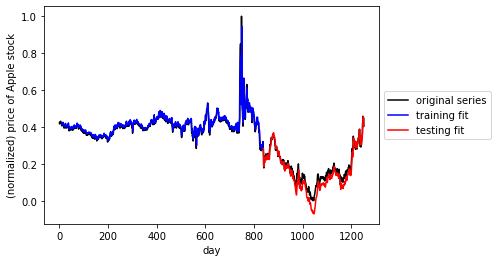

In [67]:
### Plot everything - the original series as well as predictions on training and testing sets
import matplotlib.pyplot as plt
%matplotlib inline

# plot original series
plt.plot(dataset,color = 'k')

# plot training set prediction
split_pt = train_test_split + window_size 
plt.plot(np.arange(window_size,split_pt,1),train_predict,color = 'b')

# plot testing set prediction
plt.plot(np.arange(split_pt,split_pt + len(test_predict),1),test_predict,color = 'r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('(normalized) price of Apple stock')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()